In [1]:
import numpy as np
import rebound

### Functions

In [9]:
#sampling interval
def get_sample_interval(sim,samples_per_orbit):
    o = sim.calculate_orbits(heliocentric=True)
    return o[0].P/samples_per_orbit

#remove high freq 
def low_pass(samples,tmax,cutoff):
    Npts_sample = len(samples)
    window = np.hanning(Npts_sample)
    fft = 2*np.sqrt(np.fft.fft(sample*window)/Npts_sample)
    freq = np.fft.fftfreq(Npts_sample, tmax/float(Npts_sample))
    fft = fft[freq < cutoff]
    return np.fft.ifft(fft)

In [3]:
filename='ic0000000.bin'
sim = rebound.Simulation.from_file(filename)
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	May 11 2017 15:14:36
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=2.15130954841e-05 y=-2.83134950296e-05 z=-3.59702797063e-07 vx=0.000184889789743 vy=0.000118365239205 vz=-2.10835927452e-06>
<rebound.Particle object, m=3.41401601921e-05 x=-0.0658395691021 y=0.997590609731 z=-0.00120070677257 vx=-6.26836429024 vy=-0.445311904669 vz=0.0559526195024>
<rebound.Particle object, m=1.87872497534e-05 x=-1.14094577147 y=-0.203694227095 z=0.0167610663709 vx=1.22970372256 vy=-5.8554285143 vz=-0.0177819457008>
<rebound.Particle object, m=1.82689985991e-06 x=1.18775591557 y=-1.04962177571 z=0.0469652335416 vx=3.28995608402 vy=3.74688214542 vz=0.291314126296>
---------------------------------


/Users/silburt/phd/rebound/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [4]:
samples_per_orbit = 3
dt = get_sample_interval(sim,samples_per_orbit)
tmax = 1e5

sma = []
while sim.t < tmax:
    sim.integrate(sim.t + dt)
    o = sim.calculate_orbits(heliocentric=True)
    sma.append([o[0].a, o[1].a, o[2].a])

In [5]:
a1, a2, a3 = zip(*sma)

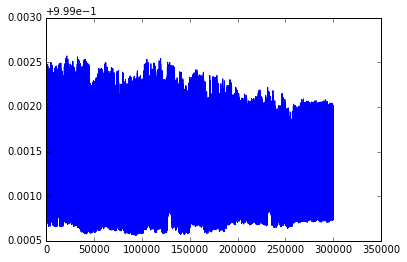

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a1)

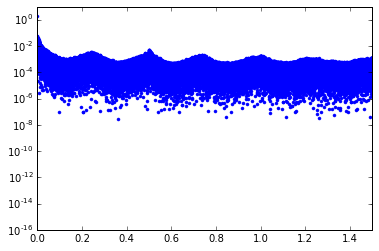

In [18]:
samples = a3
Npts = len(samples)
window = np.hanning(Npts)
fft = 2*np.sqrt(np.fft.fft(samples*window)/Npts)
freq = np.fft.fftfreq(Npts, tmax/float(Npts))
plt.plot(freq,fft, '.')
plt.xlim([0,1.5])
plt.yscale('log')
#fft = fft[freq < cutoff]
#samples2 = np.fft.ifft(fft)